# Clustering Crypto

In [33]:
# Initial imports
import pandas as pd
import hvplot.pandas
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Data Preprocessing

In [34]:
# Loade the cryptocurrencies data
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [35]:
# Keep only cryptocurrencies that are on trading
crypto_df = crypto_df[crypto_df.IsTrading == True] 
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [36]:
# Test crypto_df to ensure that no False IsTrading values are in the DataFrame
False_IsTrading_df = crypto_df[crypto_df.IsTrading == False]
False_IsTrading_df.head() # Empty DataFrame

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply


In [37]:
crypto_df.IsTrading.value_counts()

True    1144
Name: IsTrading, dtype: int64

In [38]:
crypto_df.shape

(1144, 6)

In [39]:
# Keep only cryptocurrencies with a working algorithm
crypto_df.Algorithm.value_counts().head()

Scrypt     394
X11        182
SHA-256    121
X13         54
PoS         42
Name: Algorithm, dtype: int64

In [40]:
# Remove the "IsTrading" column
new_crypto_df = crypto_df.drop(["IsTrading"], axis=1)
new_crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [41]:
# Restore the original DataFrame Name, i.e. crypto_df
crypto_df = new_crypto_df
crypto_df.head(10)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [42]:
# Remove rows with at least 1 null value
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [43]:
# Remove rows with cryptocurrencies without coins mined
crypto_df.dropna(subset=['TotalCoinsMined'],inplace=True)

In [44]:
# Fetch the cryptocurrencies names prior to drop them from crypto_df
crypto_df.CoinName.value_counts()

DubaiCoin                2
XenixCoin                1
Ucoin                    1
Particl                  1
Insane Coin              1
ArgusCoin                1
Dekado                   1
Onix                     1
EuropeCoin               1
ChessCoin                1
Bitcoin Scrypt           1
XXXCoin                  1
HexCoin                  1
SexCoin                  1
HollyWoodCoin            1
CryptoBullion            1
Bitcoin Incognito        1
Bitcoin Rhodium          1
MegaCoin                 1
Shilling                 1
VaultCoin                1
MinCoin                  1
Franko                   1
Degas Coin               1
KushCoin                 1
Frankywillcoin           1
BitSend                  1
VirtaCoin                1
Junson Ming Chan Coin    1
Xchange                  1
                        ..
Paycon                   1
DigitalNote              1
IXcoin                   1
Citadel                  1
NeptuneClassic           1
MarxCoin                 1
L

In [45]:
# Remove the cryptocurrency name since it's not going to be used on the clustering algorithm
drop_cryptoname_df = crypto_df.drop(["CoinName"], axis=1)
drop_cryptoname_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [46]:
# Reset DataFrame name
crypto_df = drop_cryptoname_df
crypto_df.head(10)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000


In [47]:
# Create dummies variables for text features
dummy = pd.get_dummies(crypto_df)
dummy.head()

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,TotalCoinSupply_92000000000,TotalCoinSupply_92233720000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
42,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Standardize data
from sklearn import preprocessing

crypto_scaled = StandardScaler().fit_transform(dummy)
print(crypto_scaled[0:5])

[[-0.10282804 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.07661326 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.10282804 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [ 0.62458365 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]
 [-0.10238266 -0.03823596 -0.03823596 ... -0.03823596 -0.03823596
  -0.03823596]]


### Reducing Dimensions Using PCA

In [49]:
# Applying PCA to reduce dimensions from 4 to 3

# Initialize PCA model
pca = PCA(n_components=3)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(crypto_scaled)


In [50]:
# Create a DataFrame with the principal components data
# Transform PCA data to a DataFrame
crypto_df_pca = pd.DataFrame(
    data=crypto_pca, columns=["principal component 1", "principal component 2", "principal component 3"]
)
crypto_df_pca.head()

,principal component 1,principal component 2,principal component 3
0,-0.163257,-0.057270,-0.198201
1,-0.141021,-0.063825,-0.184962
2,-0.078038,-0.093111,-0.104438
3,0.499077,-0.117722,-0.281691
4,-0.294186,-0.075266,0.030603


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [51]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range ok k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_df_pca)
    inertia.append(km.inertia_)

In [52]:
# Create the Elbow Curve using hvPlot

crypto_elbow_data = {"k": k, "inertia": inertia}
crypto_df_elbow = pd.DataFrame(crypto_elbow_data)
crypto_df_elbow.hvplot.line(x="k", y="inertia", xticks=k)

:Curve   [k]   (inertia)

Running K-Means with `k=4`

In [53]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=5)

# Fit the model
model.fit(crypto_df_pca)

# Predict clusters
predictions = model.predict(crypto_df_pca)
print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [54]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features

# Add model lables (new column) to DataFrame 
crypto_df_pca["class"] = model.labels_
crypto_df_pca.head()

,principal component 1,principal component 2,principal component 3,class
0,-0.163257,-0.057270,-0.198201,0
1,-0.141021,-0.063825,-0.184962,0
2,-0.078038,-0.093111,-0.104438,0
3,0.499077,-0.117722,-0.281691,0
4,-0.294186,-0.075266,0.030603,0


### Visualizing Results

#### 3D-Scatter with Clusters

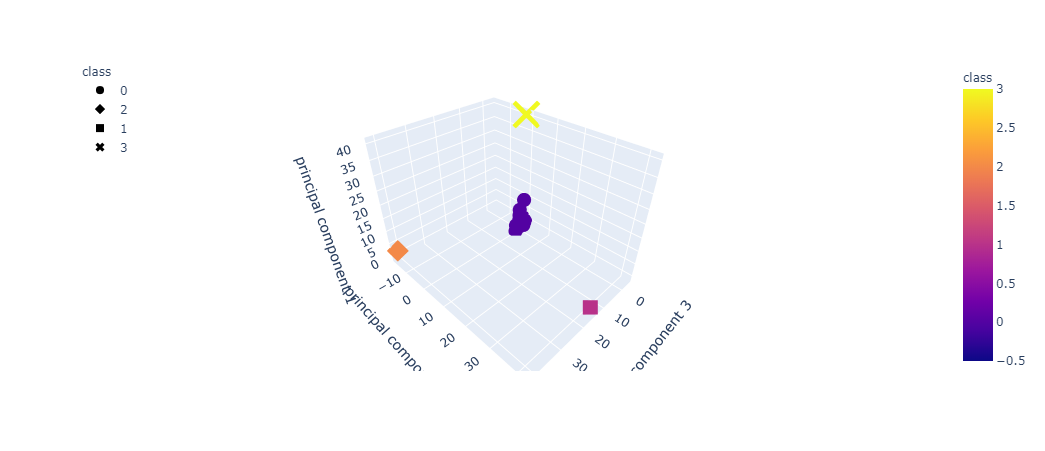

In [55]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    crypto_df_pca,
    x="principal component 3",
    y="principal component 2",
    z="principal component 1",
    color="class",
    symbol="class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


#### Table of Tradable Cryptocurrencies

In [63]:
# Table with tradable cryptos
file_path = Path("crypto_data.csv")
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df = crypto_df[crypto_df.IsTrading == True]
crypto_df.CoinName

42                      42 Coin
365                     365Coin
404                     404Coin
611                   SixEleven
808                         808
1337                  EliteCoin
2015                  2015 coin
BTC                     Bitcoin
ETH                    Ethereum
LTC                    Litecoin
DASH                       Dash
XMR                      Monero
ETC            Ethereum Classic
ZEC                       ZCash
BTS                   Bitshares
DGB                    DigiByte
BTCD                BitcoinDark
CRAIG                CraigsCoin
XBS                    Bitstake
XPY                     PayCoin
PRC                 ProsperCoin
YBC                      YbCoin
DANK                   DarkKush
GIVE                   GiveCoin
KOBO                   KoboCoin
DT                    DarkToken
CETI                 CETUS Coin
SPR                  Spreadcoin
WOLF              Insanity Coin
ACOIN                     ACoin
                  ...          
AHT     

In [77]:
# Print the total number of tradable cryptocurrencies
tradable_crypto = crypto_df.CoinName
tradable_crypto.shape

(1144,)

In [78]:
tradable_crypto.head(10)

42        42 Coin
365       365Coin
404       404Coin
611     SixEleven
808           808
1337    EliteCoin
2015    2015 coin
BTC       Bitcoin
ETH      Ethereum
LTC      Litecoin
Name: CoinName, dtype: object

In [79]:
tradable_crypto.tail(10)

ZEPH         ZEPHYR
XQN        Quotient
NETC    NetworkCoin
VPRC     VapersCoin
GAP         Gapcoin
SERO     Super Zero
UOS             UOS
BDX          Beldex
ZEN         Horizen
XBC     BitcoinPlus
Name: CoinName, dtype: object

#### Scatter Plot with Tradable Cryptocurrencies

In [87]:
# Scale data to create the scatter plot
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = tradable_crypto
y = x.value_counts()
colors = rng.rand(100)
rng = np.random.RandomState(0)
sizes = 1000 * rng.rand(100)

#plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,cmap='viridis')
#plt.colorbar();  # show color scale

In [ ]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
